# Visualizing the mouse behavior

In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import tree as Tree
import sklearn.tree
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

In [48]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

r_8020 = record[((record['Left Reward Prob'] == 0.8) |  (record['Right Reward Prob'] == 0.8))].copy()
r_8020 = r_8020[r_8020['p(high Port)'] > 0.85].copy()
r_8020 = r_8020[r_8020['No. Blocks'] > 3].copy()
r_8020 = r_8020[r_8020['Block Range Min'] == 50].copy()
r_8020 = r_8020[r_8020['Mouse ID'] == 'harry'].copy()

r_8020

,Session ID,Mouse ID,Date,Phase,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
167,07252016_harry,harry,7252016,2.0,0.2,0.8,50.0,50.0,579.0,8.0,419.0,0.88,2.0,1.0,45.0,40.0
475,07082016_harry,harry,7082016,2.0,0.8,0.2,50.0,50.0,538.0,8.0,401.0,0.88,2.0,1.0,45.0,40.0
496,07132016_harry,harry,7132016,2.0,0.8,0.2,50.0,50.0,653.0,8.0,445.0,0.89,2.0,1.0,45.0,40.0
517,07182016_harry,harry,7182016,2.0,0.8,0.2,50.0,50.0,520.0,7.0,360.0,0.88,2.0,1.0,45.0,40.0
524,07192016_harry,harry,7192016,2.0,0.8,0.2,50.0,50.0,800.0,11.0,574.0,0.87,2.0,1.0,45.0,40.0


In [61]:
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward']

In [62]:
data = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/trial_data/07132016_harry_trials.csv',names=columns)

In [68]:
data.head(100)

,Elapsed Time (s),Since last trial (s),Trial Duration (s),Port Poked,Right Reward Prob,Left Reward Prob,Reward
0,0.367,0.000,0.367,2,0.2,0.8,1
1,10.227,4.203,0.292,2,0.2,0.8,0
2,11.973,1.541,0.205,2,0.2,0.8,0
3,16.887,4.599,0.315,1,0.2,0.8,0
4,23.056,1.800,0.464,2,0.2,0.8,1
5,26.646,1.235,0.277,2,0.2,0.8,1
6,28.112,1.186,0.280,2,0.2,0.8,1
7,29.835,1.433,0.290,2,0.2,0.8,0
8,32.376,1.404,0.283,2,0.2,0.8,1
9,33.873,1.165,0.332,2,0.2,0.8,1


In [59]:
time_mins = data['Elapsed Time (s)'].values / 60.0

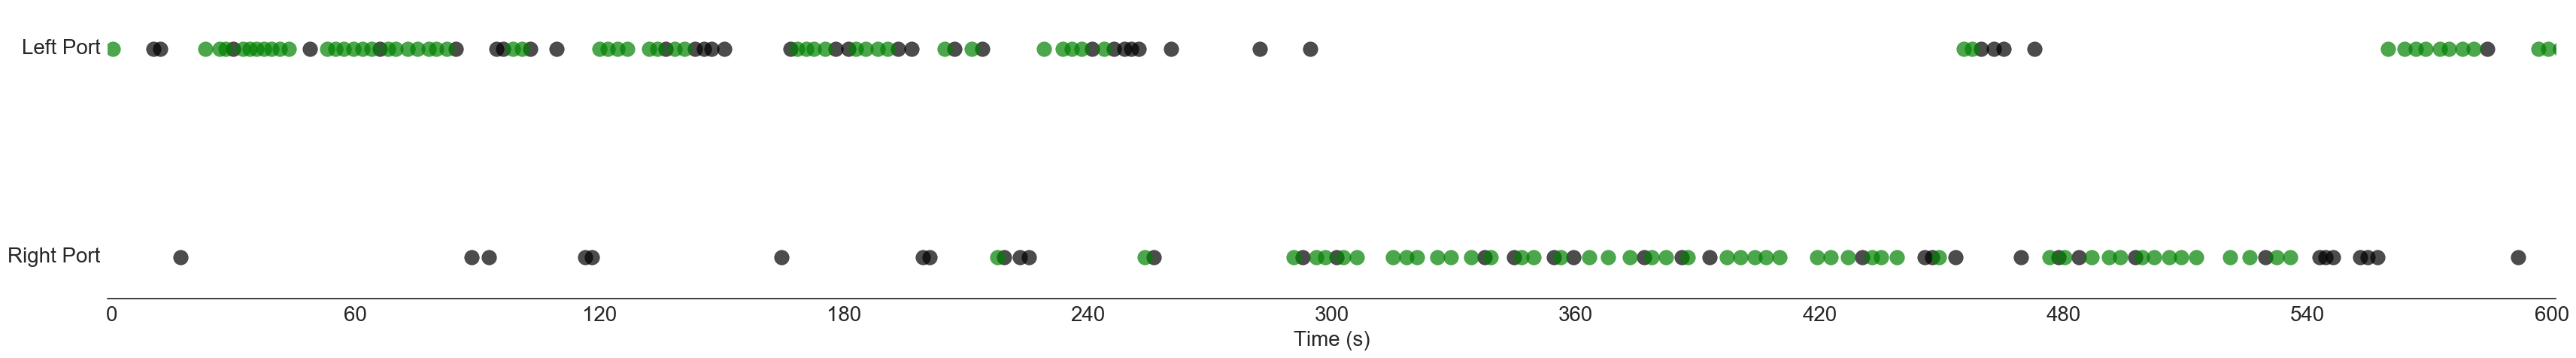

In [78]:
num_trials = 600
sns.set_style('white')
plt.figure(figsize=(42,5))
plt.scatter(data[data['Reward'] == 0]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 0]['Port Poked'].values[:num_trials],color='black',s=200,alpha=0.7)
plt.scatter(data[data['Reward'] == 1]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 1]['Port Poked'].values[:num_trials],color='green',s=200,alpha=0.7)

plt.yticks([1,2],['Right Port','Left Port'],fontsize=20)
plt.xticks(np.arange(0,700,60),fontsize=20)
plt.xlim(-1,601)
plt.xlabel('Time (s)',fontsize=20)
plt.ylim(0.8,2.2)

sns.despine(left=True)

In [47]:
data[58:100]

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,Decision,Switch,Higher p port,Reward
58,K1,11042016_K1,58.0,57.0,4.0,1.0,0.0,1.0,1.0
59,K1,11042016_K1,0.0,58.0,5.0,1.0,0.0,0.0,0.0
60,K1,11042016_K1,1.0,59.0,-1.0,1.0,0.0,0.0,0.0
61,K1,11042016_K1,2.0,60.0,-2.0,1.0,0.0,0.0,0.0
62,K1,11042016_K1,3.0,61.0,-3.0,1.0,0.0,0.0,0.0
63,K1,11042016_K1,4.0,62.0,-4.0,1.0,0.0,0.0,0.0
64,K1,11042016_K1,5.0,63.0,-5.0,1.0,0.0,0.0,0.0
65,K1,11042016_K1,6.0,64.0,-6.0,1.0,0.0,0.0,0.0
66,K1,11042016_K1,7.0,65.0,-7.0,1.0,0.0,0.0,0.0
67,K1,11042016_K1,8.0,66.0,-8.0,1.0,0.0,0.0,0.0
